### Introduction

While on Kaggle, I stumbled upon a dataset about Olympic athletes (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). I decided to make some interactive dashboards using Tableau, but before I could use this data I needed to do a simple merge because the data was provided in two different CSV files.

### Setup

To start, I simply import `pandas` and bring in the CSV files from Kaggle into this Jupyter Notebook: 

In [1]:
#import pandas
import pandas as pd

In [2]:
#bring in csv files
athlete = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

### Examining the Data

Next, I need to take a look at the data first to see how we can merge them:

In [5]:
#show first five rows of athlete dataframe
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#show first five rows of regions dataframe
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Merging the Data

The `athlete` dataframe consists of rows of each individual Olympic athlete and their demographics and competition statistics, while the `regions` dataframe consists of different countries and their respective NOC (National Olympic Committee) 3-letter codes. Speaking of NOC, I notice that both dataframes have a column called `NOC`, so it looks like I can merge both of these dataframes using that column.

When using the `merge` method, I want to make sure all rows in the `athlete` dataframe are included, so I include `how = 'left'` to make sure a left join is made. This will bring in all the rows from the `athlete` dataframe, even if a match can't be found in the `regions` dataframe.

In [7]:
#merge athlete and regions dataframes based on NOC column
NOC = pd.merge(athlete, regions, how = 'left')

Let's take a look at this new dataframe:

In [8]:
#show head of NOC dataframe
NOC.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Almost there, but I notice that there seems to be some null values in this dataframe, at least in the **Medal** and **notes** columns. I should check to see if there are any other null values in other columns.

In [9]:
#check for nulls in NOC
NOC.isnull().values.any()

True

In [10]:
#print number of nulls in each column in NOC
nan_count = NOC.isnull().sum()
print (nan_count)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


There are some null values in the **Age**, **Height**, **Weight**, and **region** columns as well. Fortunately, Tableau lets me bring in a CSV file with nulls, so we can include these four columns. As for the other two columns with null values, I need to take the following steps:

1. The **notes** column is not very necessary, so that can be deleted.
2. The NaNs in the **Medal** column mean that the athlete competed in their event but did not receive a medal. Instead of NaN, these should say DNP (did not place).

In [11]:
#remove "notes" column
del NOC['notes']

#replace "NaN" values in Medal column with "DNP"
NOC['Medal'].fillna('DNP', inplace=True)

#show head of "NOC" dataframe
NOC.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNP,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNP,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNP,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNP,Netherlands


### Last Steps

The dataframe looks good, but I want to check one more thing: the shape of the original and new dataframes.

In [12]:
#check shape of athletes dataframe
athlete.shape

(271116, 15)

In [13]:
#check shape of NOC dataframe
NOC.shape

(271116, 16)

Good, the number of rows are the same in both the original and new dataframes, which means no athletes were left out. The number of columns are different because I added two columns from the original dataframe to the new one, but dropped one column.

`NOC` is ready to be exported.

In [14]:
#export NOC to CSV
NOC.to_csv('athlete_events_NOC.csv')

### Dashboards

From here I was able to create some dashboards using Tableau. You can open the interactive versions of these dashboards by clicking the links below:

1. Olympic Medal Winners 1896- 2016: https://public.tableau.com/app/profile/michael.khosrofian/viz/OlympicMedalWinners1896-2016/Games

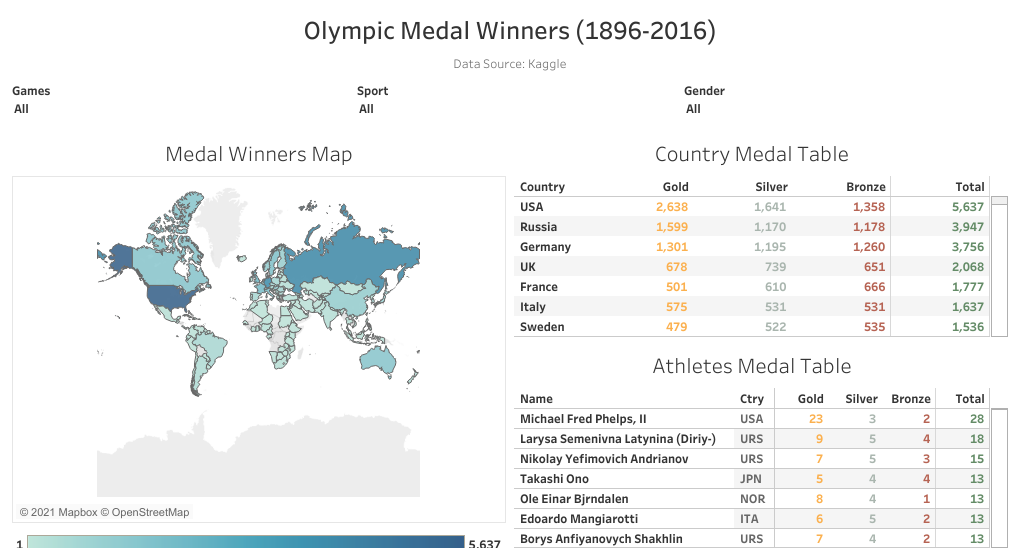

2. Physical Measurement Distributions of Olympic Athletes (1896 - 2016): https://public.tableau.com/app/profile/michael.khosrofian/viz/PhysicalMeasurementDistributionsofOlympicAthletes1896-2016/Physical

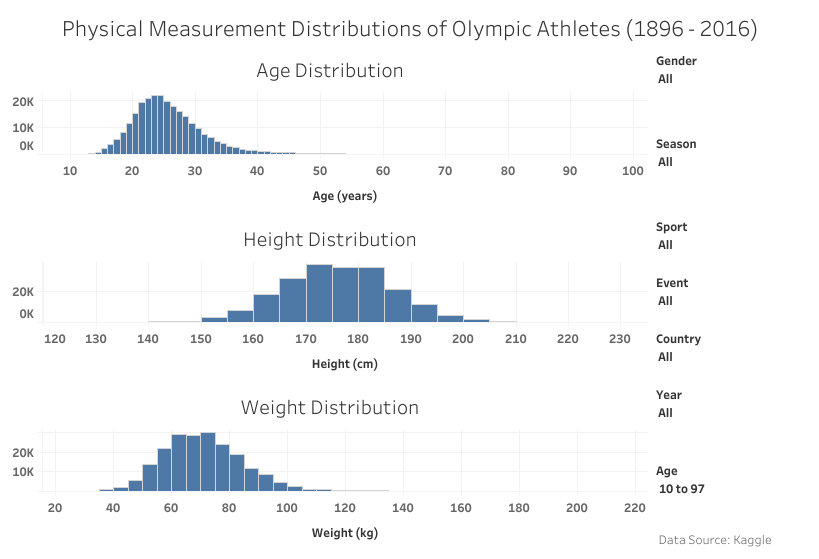

3. Olympic Medals by Country (1896-2016): https://public.tableau.com/app/profile/michael.khosrofian/viz/OlympicMedalsbyCountry1896-2016_16302687418340/CountryDash

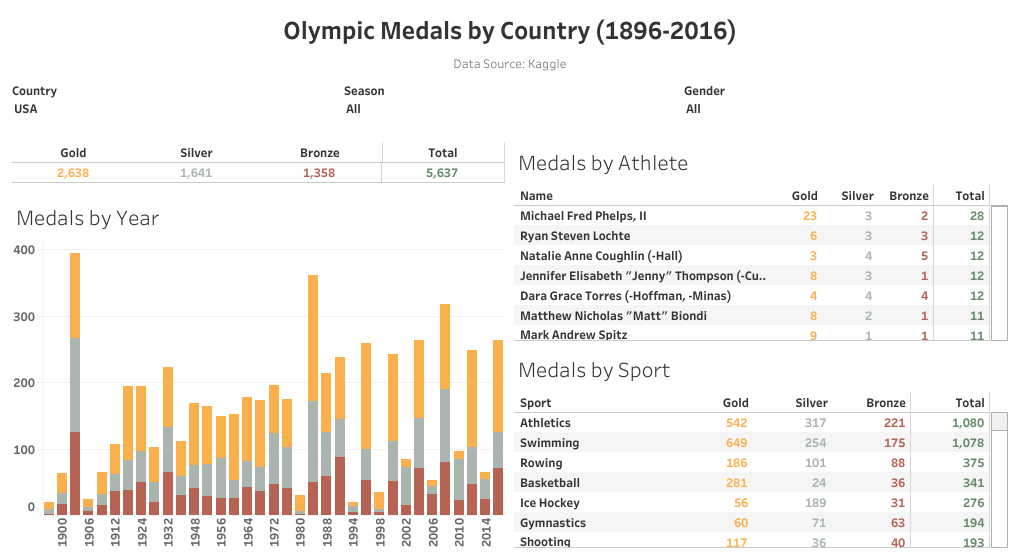